In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import random
from pprint import pprint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import timeit
import matplotlib.pyplot as plt
from dtreefunctions import decision_tree_algorithm,decision_tree_predictions,train_test_split
from randomforestfunctions import random_forest_algorithm,random_forest_predictions

In [7]:
df = pd.read_csv("mammograph.csv",skipinitialspace=True)
df["label"] = df.Severity
df = df.drop("Severity", axis=1)
df = df.drop("BI-RADS_assessment", axis=1) #Removed -- Non predictive


column_names = []
for column in df.columns:
    name = column.replace("-", "_")
    column_names.append(name)
df.columns = column_names


In [8]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)


In [9]:
forest = random_forest_algorithm(train_df, n_trees=60, n_bootstrap=20, n_features=5, dt_max_depth=10)


In [10]:
predictions = random_forest_predictions(test_df, forest)
accuracy_score(predictions, test_df.label)

0.8177083333333334

In [11]:
test_df.head()

,Age,Shape,Margin,Density,label
864,55,4,4,3,1
394,34,?,?,4,0
776,44,2,1,3,0
911,35,1,1,3,0
430,37,1,1,3,0


In [12]:
import timeit
tic=timeit.default_timer()
Accuracy = []
x = [50,100,150,200,250,300,350,400,450,500]
for i in x:
    forest = random_forest_algorithm(train_df, n_trees=60, n_bootstrap=i, n_features=5, dt_max_depth=10)
    predictions = random_forest_predictions(test_df, forest)
    Accuracy.append(accuracy_score(predictions, test_df.label))

toc=timeit.default_timer()
print(toc - tic)



91.29447200499999


In [13]:
index_accuracies = np.arange(1,21)
column_name=["Accuracy"]
df_result = pd.DataFrame({'Accuracies':Accuracy})

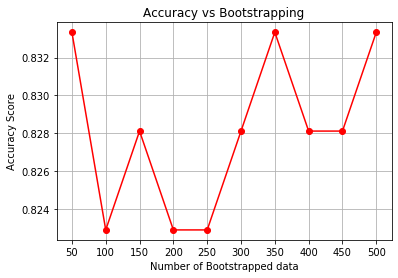

In [14]:
plt.plot(x,df_result["Accuracies"],'r',marker='o') # 'r' is the color red
plt.xlabel('Number of Bootstrapped data')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Bootstrapping')
plt.grid(True)
plt.xticks(x)
plt.show()